# **EJEMPLO 1 TENSOR FLOW**

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import datasets

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

0


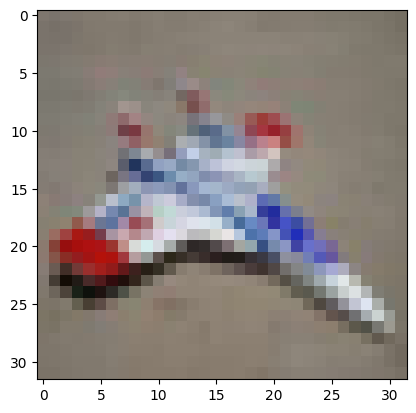

In [6]:
plt.imshow(x_train[30])
print(y_train[30])

In [7]:
name = [
    'avión',
    'automóvil',
    'ave',
    'gato',
    'ciervo',
    'perro',
    'rana',
    'caballo',
    'barco',
    'camión'
    ]

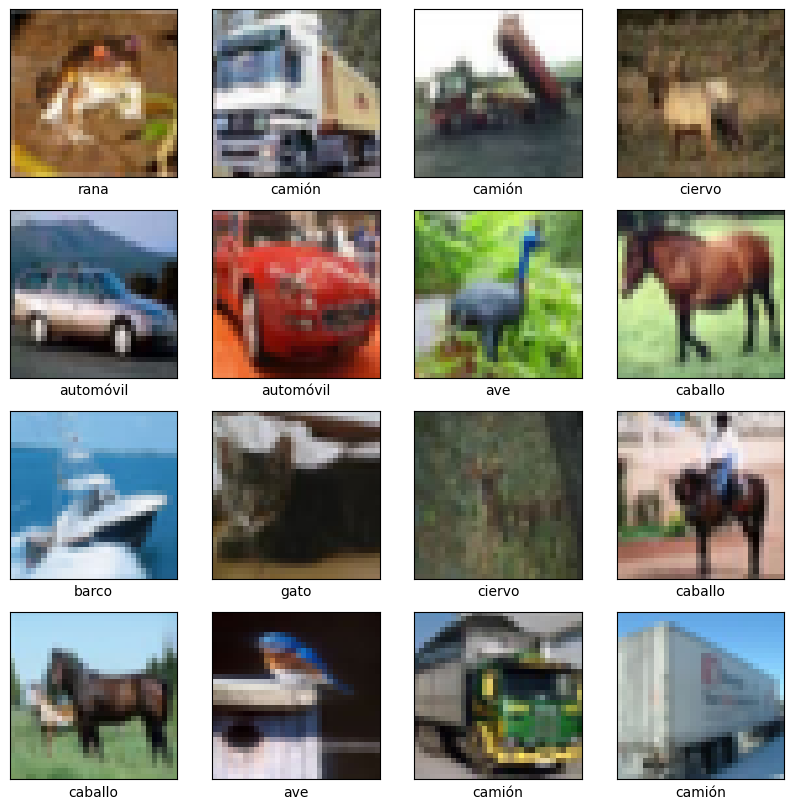

In [8]:
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(name[y_train[i]])
  plt.xticks([])
  plt.yticks([])

In [9]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

In [10]:
x_train=x_train / 255.0
x_test=x_test / 255.0

In [11]:
import tensorflow as tf

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [14]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [16]:
batch_size = 32
epochs = 50

In [17]:
history = model.fit(x_train, y_train,
                    batch_size= batch_size,
                    epochs= epochs,
                    validation_data= (x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - acc: 0.2574 - loss: 2.0086 - val_acc: 0.4287 - val_loss: 1.5848
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.4273 - loss: 1.5836 - val_acc: 0.5023 - val_loss: 1.3802
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.4978 - loss: 1.4067 - val_acc: 0.5451 - val_loss: 1.2756
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.5350 - loss: 1.3004 - val_acc: 0.5676 - val_loss: 1.2318
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.5713 - loss: 1.2120 - val_acc: 0.6213 - val_loss: 1.0858
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.6004 - loss: 1.1379 - val_acc: 0.6058 - val_loss: 1.1193
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6194 - loss: 1.0787 - val_acc: 0.6576 - val_loss: 0.9785
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6330 - loss: 1.0356 - val_acc: 0.6691 - val_loss: 0.9550
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━

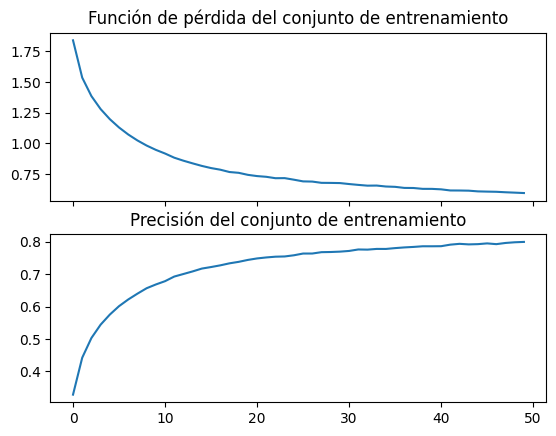

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

# **EJEMPLO 2 PYTHORCH**

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1. CONFIGURACIÓN DE DISPOSITIVO
# Configura el dispositivo para usar GPU si está disponible, de lo contrario usa CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. CARGA Y PREPROCESAMIENTO DE DATOS
# Define las transformaciones para los datos (conversión a tensores y normalización)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convierte imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

# Carga del conjunto de entrenamiento con transformaciones
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # DataLoader para iterar sobre los datos

# Carga del conjunto de prueba con transformaciones
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:05<00:00, 29.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [20]:
# 3. DEFINICIÓN DE LA CNN
# Define una red neuronal convolucional simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Primera capa convolucional
        self.relu1 = nn.ReLU()  # Activación ReLU
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Capa de pooling
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Segunda capa convolucional
        self.relu2 = nn.ReLU()  # Activación ReLU
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Capa completamente conectada
        self.fc2 = nn.Linear(512, 10)  # Capa de salida para 10 clases

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))  # Paso por la primera capa
        x = self.pool(self.relu2(self.conv2(x)))  # Paso por la segunda capa
        x = x.view(-1, 64 * 8 * 8)  # Aplanamiento del tensor para las capas completamente conectadas
        x = self.fc1(x)  # Paso por la primera capa completamente conectada
        x = self.fc2(x)  # Paso por la capa de salida
        return x

# Instancia del modelo y transferencia al dispositivo
model = SimpleCNN().to(device)


In [21]:
# 4. DEFINICIÓN DE PÉRDIDA Y OPTIMIZADOR
# Define la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()  # Pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

In [22]:
# 5. ENTRENAMIENTO DEL MODELO
# Definición de parámetros de entrenamiento
epochs = 5  # Número de épocas
train_losses = []  # Lista para almacenar la pérdida de entrenamiento
test_losses = []  # Lista para almacenar la pérdida de prueba

for epoch in range(epochs):
    model.train()  # Modo de entrenamiento
    running_loss = 0.0
    for images, labels in train_loader:  # Itera sobre lotes de datos de entrenamiento
        images, labels = images.to(device), labels.to(device)  # Transfiere los datos al dispositivo

        optimizer.zero_grad()  # Resetea los gradientes
        outputs = model(images)  # Pasa los datos por el modelo
        loss = criterion(outputs, labels)  # Calcula la pérdida
        loss.backward()  # Propagación hacia atrás
        optimizer.step()  # Actualización de pesos

        running_loss += loss.item()  # Acumula la pérdida

    train_losses.append(running_loss / len(train_loader))  # Calcula la pérdida media de la época

    # Evaluación
    model.eval()  # Modo de evaluación
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # No se calculan gradientes durante la evaluación
        for images, labels in test_loader:  # Itera sobre los datos de prueba
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Predicciones del modelo
            loss = criterion(outputs, labels)  # Calcula la pérdida
            test_loss += loss.item()  # Acumula la pérdida
            _, predicted = outputs.max(1)  # Predicción de la clase con mayor probabilidad
            total += labels.size(0)  # Total de etiquetas
            correct += predicted.eq(labels).sum().item()  # Cuenta las predicciones correctas

    test_losses.append(test_loss / len(test_loader))  # Calcula la pérdida media de la época
    accuracy = 100.0 * correct / total  # Calcula la precisión

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1/5, Train Loss: 1.2986, Test Loss: 1.0694, Accuracy: 62.54%
Epoch 2/5, Train Loss: 0.9565, Test Loss: 0.9566, Accuracy: 66.46%
Epoch 3/5, Train Loss: 0.8419, Test Loss: 0.9020, Accuracy: 68.91%
Epoch 4/5, Train Loss: 0.7641, Test Loss: 0.9286, Accuracy: 68.51%
Epoch 5/5, Train Loss: 0.7070, Test Loss: 0.8639, Accuracy: 70.34%


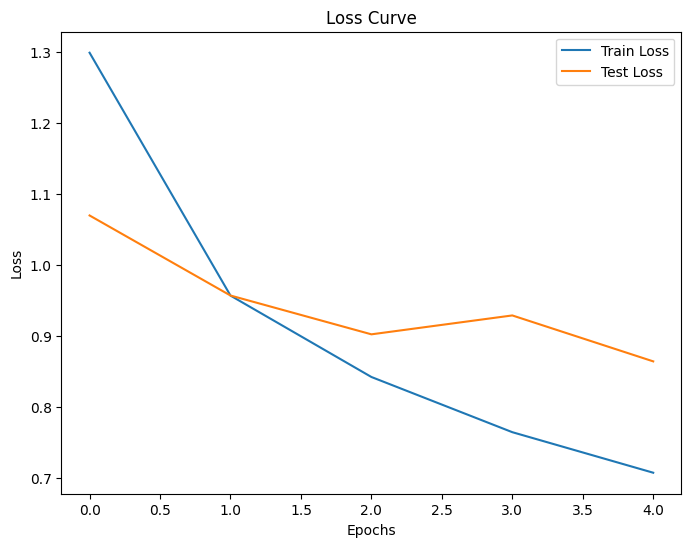

              precision    recall  f1-score   support

    airplane       0.74      0.73      0.74      1000
  automobile       0.85      0.76      0.80      1000
        bird       0.60      0.57      0.59      1000
         cat       0.57      0.47      0.51      1000
        deer       0.60      0.71      0.65      1000
         dog       0.68      0.56      0.62      1000
        frog       0.70      0.84      0.76      1000
       horse       0.69      0.82      0.75      1000
        ship       0.83      0.80      0.82      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [23]:
# 6. VISUALIZACIÓN DE MÉTRICAS
# Visualiza las curvas de pérdida
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# 7. EVALUACIÓN FINAL
# Genera predicciones finales y evalúa el rendimiento
all_preds = []
all_labels = []

model.eval()  # Modo de evaluación
with torch.no_grad():  # No se calculan gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Predicciones del modelo
        _, predicted = outputs.max(1)  # Predicción de la clase con mayor probabilidad
        all_preds.extend(predicted.cpu().numpy())  # Almacena las predicciones
        all_labels.extend(labels.cpu().numpy())  # Almacena las etiquetas verdaderas

# Imprime el informe de clasificación
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


# **EJEMPLO 3 TENSORFLOW**

In [24]:
import tensorflow as tf  # Importa TensorFlow, una librería para machine learning y redes neuronales.
from tensorflow.keras import layers, models  # Importa módulos específicos para construir redes neuronales usando Keras.
import matplotlib.pyplot as plt  # Importa la librería para la visualización de gráficos.
from sklearn.metrics import classification_report  # Importa la función para generar un reporte de clasificación.

# 1. CARGA Y PREPROCESAMIENTO DE DATOS
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  # Carga el dataset CIFAR-10, que contiene imágenes y etiquetas. Se divide en datos de entrenamiento y prueba.

# Normalización de datos
x_train = x_train.astype('float32') / 255.0  # Convierte las imágenes de entrenamiento a float32 y normaliza los valores de píxeles entre 0 y 1.
x_test = x_test.astype('float32') / 255.0  # Hace lo mismo para los datos de prueba.

# Codificación one-hot para las etiquetas
y_train = tf.keras.utils.to_categorical(y_train, 10)  # Codifica las etiquetas de entrenamiento en formato one-hot (10 clases).
y_test = tf.keras.utils.to_categorical(y_test, 10)  # Codifica las etiquetas de prueba en formato one-hot.

In [25]:
# 2. DEFINICIÓN DE LA CNN
model = models.Sequential([  # Crea un modelo secuencial, donde las capas se agregan una tras otra.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Crea una capa convolucional con 32 filtros, un tamaño de kernel de 3x3 y la función de activación ReLU.
    layers.MaxPooling2D((2, 2)),  # Crea una capa de max pooling con un tamaño de 2x2.
    layers.Conv2D(64, (3, 3), activation='relu'),  # Agrega otra capa convolucional con 64 filtros.
    layers.MaxPooling2D((2, 2)),  # Agrega otra capa de max pooling.
    layers.Flatten(),  # Aplana la salida para pasarla a una capa densa.
    layers.Dense(512, activation='relu'),  # Crea una capa densa con 512 neuronas y activación ReLU.
    layers.Dense(10, activation='softmax')  # Crea la capa de salida con 10 neuronas (una por clase) y activación softmax.
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compilación del modelo
model.compile(optimizer='adam',  # Usa el optimizador Adam para el ajuste de los pesos.
              loss='categorical_crossentropy',  # Usa la función de pérdida de entropía cruzada categórica, adecuada para clasificación multi-clase.
              metrics=['accuracy'])  # Monitoriza la precisión durante el entrenamiento.

In [27]:
# 3. ENTRENAMIENTO DEL MODELO
epochs = 50  # Establece el número de épocas para el entrenamiento.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))  # Entrena el modelo usando los datos de entrenamiento y valida con los datos de prueba.

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4032 - loss: 1.6515 - val_accuracy: 0.5906 - val_loss: 1.1777
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6156 - loss: 1.0969 - val_accuracy: 0.6498 - val_loss: 0.9948
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6869 - loss: 0.8976 - val_accuracy: 0.6604 - val_loss: 0.9681
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7331 - loss: 0.7686 - val_accuracy: 0.6991 - val_loss: 0.8940
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7803 - loss: 0.6336 - val_accuracy: 0.6975 - val_loss: 0.9008
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8204 - loss: 0.5212 - val_accuracy: 0.7136 - val_loss: 0.8727
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8626 - loss: 0.4059 - val_accuracy: 0.7129 - val_loss: 0.9197
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9014 - loss: 0.3025 - val_accuracy: 0.

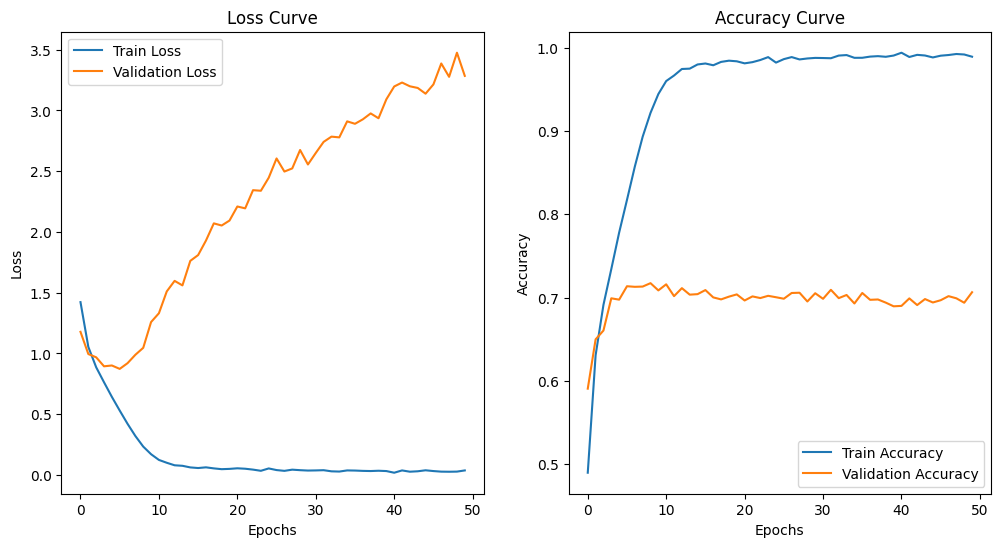

In [28]:
# 4. VISUALIZACIÓN DE LAS MÉTRICAS
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura para la visualización.

# Curvas de pérdida
plt.subplot(1, 2, 1)  # Crea un subgráfico en la primera posición (de 2).
plt.plot(history.history['loss'], label='Train Loss')  # Dibuja la curva de pérdida de entrenamiento.
plt.plot(history.history['val_loss'], label='Validation Loss')  # Dibuja la curva de pérdida de validación.
plt.xlabel('Epochs')  # Etiqueta del eje X.
plt.ylabel('Loss')  # Etiqueta del eje Y.
plt.legend()  # Muestra la leyenda.
plt.title('Loss Curve')  # Título del gráfico.

# Curvas de precisión
plt.subplot(1, 2, 2)  # Crea un subgráfico en la segunda posición.
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Dibuja la curva de precisión de entrenamiento.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Dibuja la curva de precisión de validación.
plt.xlabel('Epochs')  # Etiqueta del eje X.
plt.ylabel('Accuracy')  # Etiqueta del eje Y.
plt.legend()  # Muestra la leyenda.
plt.title('Accuracy Curve')  # Título del gráfico.

plt.show()  # Muestra los gráficos.


In [29]:
# 5. EVALUACIÓN FINAL
predictions = model.predict(x_test)  # Realiza predicciones sobre el conjunto de prueba.
y_pred = tf.argmax(predictions, axis=1).numpy()  # Obtiene las etiquetas predichas tomando el índice del valor máximo en cada predicción (la clase más probable).
y_true = tf.argmax(y_test, axis=1).numpy()  # Obtiene las etiquetas reales tomando el índice del valor máximo en las etiquetas one-hot.

print(classification_report(y_true, y_pred, target_names=["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]))  # Imprime el reporte de clasificación con las métricas de precisión, recall, f1-score para cada clase.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Airplane       0.81      0.71      0.76      1000
  Automobile       0.84      0.81      0.83      1000
        Bird       0.63      0.59      0.61      1000
         Cat       0.48      0.58      0.53      1000
        Deer       0.65      0.67      0.66      1000
         Dog       0.62      0.57      0.59      1000
        Frog       0.73      0.81      0.77      1000
       Horse       0.78      0.72      0.75      1000
        Ship       0.80      0.82      0.81      1000
       Truck       0.78      0.78      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# **EJEMPLO 4 DATA LOADER**

In [30]:
from torch.utils.data import DataLoader, Dataset

# Supongamos que tienes un Dataset personalizado
class MiDataset(Dataset):
    def __init__(self, datos):
        self.datos = datos

    def __len__(self):
        return len(self.datos)

    def __getitem__(self, idx):
        return self.datos[idx]

# Crear un Dataset
datos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mi_dataset = MiDataset(datos)

# Crear un DataLoader
dataloader = DataLoader(
    dataset=mi_dataset,  # Dataset a utilizar
    batch_size=3,        # Tamaño del lote
    shuffle=True,        # Mezclar los datos
    num_workers=2        # Número de procesos para cargar datos
)

# Iterar sobre el DataLoader
for batch in dataloader:
    print(batch)

tensor([9, 5, 7])
tensor([2, 3, 1])
tensor([ 6, 10,  8])
tensor([4])


In [31]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transformaciones para las imágenes
transformaciones = transforms.Compose([
    transforms.ToTensor(),  # Convierte la imagen a un tensor
])

# Cargar el dataset (por ejemplo, MNIST)
dataset = datasets.MNIST(
    root='./data',          # Ruta donde se almacenan los datos
    train=True,             # Conjunto de entrenamiento
    download=True,          # Descargar si no está disponible
    transform=transformaciones
)

# Crear el DataLoader
dataloader = DataLoader(
    dataset=dataset,
    batch_size=64,          # Lotes de 64 imágenes
    shuffle=True,           # Mezclar los datos
    num_workers=2           # Usar 2 procesos para cargar datos
)

# Iterar sobre el DataLoader
for imagenes, etiquetas in dataloader:
    print(imagenes.shape)  # Forma del lote: [64, 1, 28, 28]
    print(etiquetas.shape) # Forma de las etiquetas: [64]

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 348kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.22MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.44MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size

# **EJEMPLO NMIST**

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [33]:
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.capa_oculta = nn.Linear(784, 128)  # Capa oculta
        self.capa_salida = nn.Linear(128, 10)   # Capa de salida

    def forward(self, x):
        x = torch.relu(self.capa_oculta(x))  # Aplicar ReLU
        x = self.capa_salida(x)              # Capa de salida
        return x

In [34]:
# Transformaciones para las imágenes
transformaciones = transforms.Compose([
    transforms.ToTensor(),  # Convierte la imagen a un tensor
])

# Cargar el dataset MNIST
dataset = datasets.MNIST(
    root='./data',          # Ruta donde se almacenan los datos
    train=True,             # Conjunto de entrenamiento
    download=True,          # Descargar si no está disponible
    transform=transformaciones
)

# Crear el DataLoader
dataloader = DataLoader(
    dataset=dataset,
    batch_size=64,          # Lotes de 64 imágenes
    shuffle=True,           # Mezclar los datos
    num_workers=2           # Usar 2 procesos para cargar datos
)

In [35]:
# Instanciar la red
red = RedNeuronal()

# Función de pérdida
criterio = nn.CrossEntropyLoss()

# Optimizador
optimizador = optim.Adam(red.parameters(), lr=0.001)  # lr = tasa de aprendizaje

In [36]:
# Número de épocas (veces que la red verá todo el dataset)
epocas = 20

for epoca in range(epocas):
    for imagenes, etiquetas in dataloader:
        # Paso forward: calcular la salida de la red
        salida = red(imagenes.view(-1, 28 * 28))  # Aplanar las imágenes

        # Calcular la pérdida
        perdida = criterio(salida, etiquetas)

        # Paso backward: calcular gradientes
        optimizador.zero_grad()  # Reiniciar los gradientes
        perdida.backward()       # Calcular gradientes

        # Actualizar parámetros
        optimizador.step()

    print(f'Época {epoca + 1}, Pérdida: {perdida.item()}')

Época 1, Pérdida: 0.13044248521327972
Época 2, Pérdida: 0.1796913743019104
Época 3, Pérdida: 0.021504249423742294
Época 4, Pérdida: 0.0803421139717102
Época 5, Pérdida: 0.05500354617834091
Época 6, Pérdida: 0.043257445096969604
Época 7, Pérdida: 0.08814752101898193
Época 8, Pérdida: 0.044117365032434464
Época 9, Pérdida: 0.009570606052875519
Época 10, Pérdida: 0.05228950455784798
Época 11, Pérdida: 0.006863890215754509
Época 12, Pérdida: 0.006413399241864681
Época 13, Pérdida: 0.014423860237002373
Época 14, Pérdida: 7.790681411279365e-05
Época 15, Pérdida: 0.0021266054827719927
Época 16, Pérdida: 0.006270069628953934
Época 17, Pérdida: 0.0005221898900344968
Época 18, Pérdida: 0.0014625791227445006
Época 19, Pérdida: 0.013621223159134388
Época 20, Pérdida: 0.03246179595589638


In [37]:
# Cargar el conjunto de prueba
dataset_prueba = datasets.MNIST(
    root='./data',
    train=False,  # Conjunto de prueba
    download=True,
    transform=transformaciones
)

dataloader_prueba = DataLoader(dataset_prueba, batch_size=64, shuffle=False)

# Evaluar la red
correctas = 0
total = 0
with torch.no_grad():  # Desactivar gradientes para evaluación
    for imagenes, etiquetas in dataloader_prueba:
        salida = red(imagenes.view(-1, 28 * 28))
        _, predichas = torch.max(salida, 1)  # Obtener la clase predicha
        total += etiquetas.size(0)
        correctas += (predichas == etiquetas).sum().item()

print(f'Precisión en el conjunto de prueba: {100 * correctas / total:.2f}%')

Precisión en el conjunto de prueba: 97.61%
